In [1]:
#Lucas Ross 1 Mar. 2023

#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits
%matplotlib inline

In [4]:
digits = load_digits() #dataset from sklearn
print(digits.images) #matrix form, numbers indicate pixel values

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

In [8]:
label = digits.target #gets the label (unique ID)
for i in label:
    print(i, end="")

0123456789012345678901234567890955650989841773510022782012633733466649150952820017632174631391768431405369617544728225795488490898012345678901234567890123456789095565098984177351002278201263373346664915095282001763217313917684314053696175447282255488490898012345678901234567890123456789095565098984177351002278201263373346664915095282001763217463139176843140536961754472822579548849089301234567890123456789012345678909556509898417735100227820126337334666491509528200176321746313917684314053696175447282257954884908980123456789012345678901234567890955650989841773510022782012633733466649150952820017632174631391768431405369617544728225795488490898012345678901234567890123456789095565098984177351002278201263373346664915095282001763217463139176843140536961754472822579548849089801234567890123456789012345678909556509898417735100227820126337334666491509528200176321746313917684314053696175447282257954884908981234567890123456789012345678909556509898417735127820126337334666491509528200176321463139176843

In [12]:
#print out contents of dataset with f string
print(f"there are {digits.images.shape[0]} images, each image is {digits.images.shape[1]}x{digits.images.shape[2]}")

there are 1797 images, each image is 8x8


In [40]:
def showImages(start, stop): #shows all images from indices start-stop (inclusive-inclusive)
    n = (stop - start) + 1 #number of images to show
    fig, ax = plt.subplots(1, n, figsize=(n * 4, 4)) #allow n things to be shown

    for i in range(start, start + n):
        #reformat image to be 8x8 format (it already is but heres the code for it)
        ax[i].matshow(np.reshape(digits.images[i], (8,8)), cmap=plt.cm.gray) #show the matrix of pixels as colors on a graph
        ax[i].set_title(f"image {digits.target[i]}", fontsize=20) #set the title to each image's unique ID

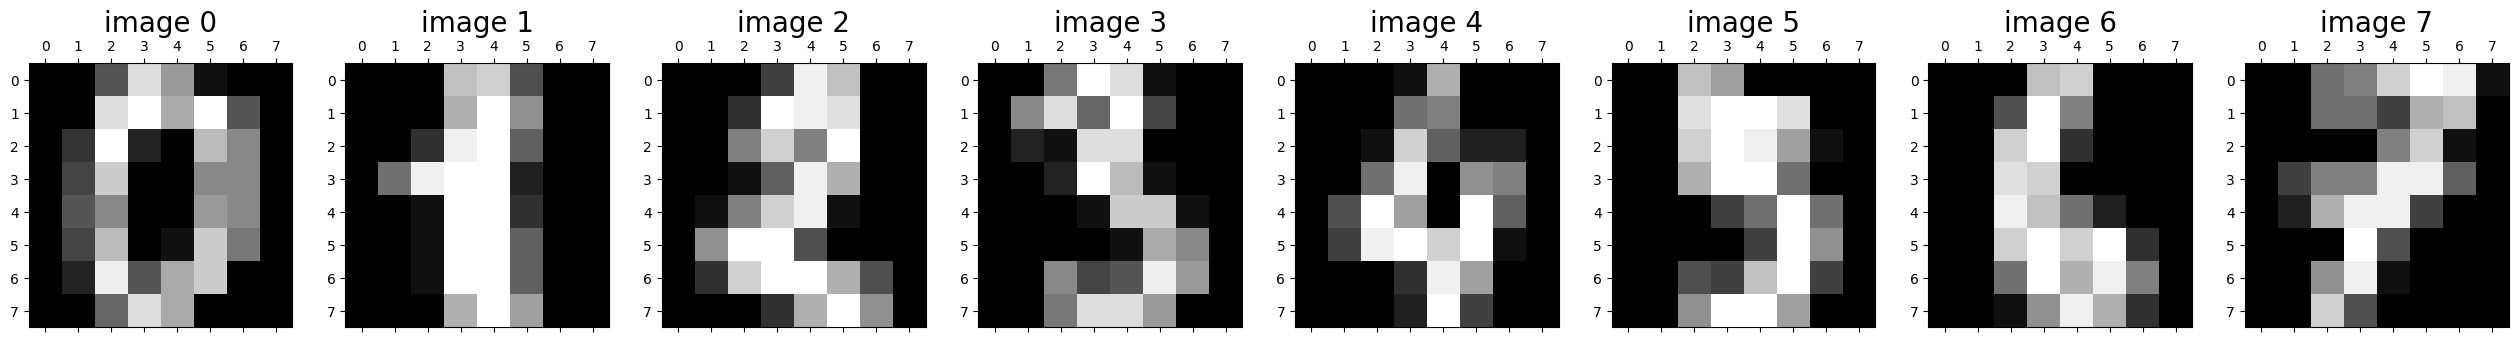

In [41]:
showImages(0, 7)

In [32]:
from sklearn.model_selection import train_test_split

#split the data
xtrain, xtest, ytrain, ytest = train_test_split(digits.data, digits.target, test_size=0.25, random_state=1)

#x = pixel data of each image
#y = unique ID

In [37]:
from sklearn.linear_model import LogisticRegression

#make a model
logmodel = LogisticRegression(max_iter=1000, C=1.0)

In [38]:
#fit the model
logmodel.fit(xtrain, ytrain)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [39]:
from sklearn.metrics import accuracy_score

#make predictions and get accuracy score
predictions = logmodel.predict(xtest)
accuracy_score(predictions, ytest) #96.8 is really good

0.9688888888888889